In [1]:
% matplotlib inline
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression as LR


In [5]:
data= pd.read_csv(r'D:\sklearn-data\give-me-some-credit-dataset\cs-training.csv',index_col=0)

In [6]:
data.shape

(150000, 11)

In [7]:
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [9]:
data.drop_duplicates(inplace=True)

In [11]:
data.shape

(149391, 11)

In [12]:
data.index = range(data.shape[0])    #更新索引

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149391 entries, 0 to 149390
Data columns (total 11 columns):
SeriousDlqin2yrs                        149391 non-null int64
RevolvingUtilizationOfUnsecuredLines    149391 non-null float64
age                                     149391 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    149391 non-null int64
DebtRatio                               149391 non-null float64
MonthlyIncome                           120170 non-null float64
NumberOfOpenCreditLinesAndLoans         149391 non-null int64
NumberOfTimes90DaysLate                 149391 non-null int64
NumberRealEstateLoansOrLines            149391 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    149391 non-null int64
NumberOfDependents                      145563 non-null float64
dtypes: float64(4), int64(7)
memory usage: 12.5 MB


In [15]:
data.isnull().mean()

SeriousDlqin2yrs                        0.000000
RevolvingUtilizationOfUnsecuredLines    0.000000
age                                     0.000000
NumberOfTime30-59DaysPastDueNotWorse    0.000000
DebtRatio                               0.000000
MonthlyIncome                           0.195601
NumberOfOpenCreditLinesAndLoans         0.000000
NumberOfTimes90DaysLate                 0.000000
NumberRealEstateLoansOrLines            0.000000
NumberOfTime60-89DaysPastDueNotWorse    0.000000
NumberOfDependents                      0.025624
dtype: float64

In [16]:
data['NumberOfDependents'].fillna(int(data['NumberOfDependents'].mean()),inplace=True)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149391 entries, 0 to 149390
Data columns (total 11 columns):
SeriousDlqin2yrs                        149391 non-null int64
RevolvingUtilizationOfUnsecuredLines    149391 non-null float64
age                                     149391 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    149391 non-null int64
DebtRatio                               149391 non-null float64
MonthlyIncome                           120170 non-null float64
NumberOfOpenCreditLinesAndLoans         149391 non-null int64
NumberOfTimes90DaysLate                 149391 non-null int64
NumberRealEstateLoansOrLines            149391 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    149391 non-null int64
NumberOfDependents                      149391 non-null float64
dtypes: float64(4), int64(7)
memory usage: 12.5 MB


In [22]:
## 用随机森林填补月收入缺失值

In [29]:
 def fill_missing(X,y,to_fill):
        df=X.copy()
        fill = df.loc[:,to_fill]
        df = pd.concat([df.loc[:,df.columns !=to_fill],pd.DataFrame(y)],axis=1)  # 组合新的特征举证
        Ytrain = fill[fill.notnull()]    #新的训练集标签，即有缺失值的特征列中，有值的部分
        Ytest = fill[fill.isnull()]     #新的测试集标签，即缺失值部分
        Xtrain = df.iloc[Ytrain.index,:]     #新的训练集    
        Xtest = df.iloc[Ytest.index,:]       #新的训练集
        #用随机森林填补缺失值
        from sklearn.ensemble import RandomForestRegressor as rfr
        rfr = rfr(n_estimators =100)
        rfr=rfr.fit(Xtrain,Ytrain)
        Ypred = rfr.predict(Xtest)
        return Ypred

In [30]:
X = data.iloc[:,1:]
y = data['SeriousDlqin2yrs']
y_predict=fill_missing(X,y,'MonthlyIncome')

In [31]:
y_predict.shape

(29221,)

In [36]:
data.loc[data.loc[:,'MonthlyIncome'].isnull(),'MonthlyIncome'] =  y_predict  #填充缺失值

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149391 entries, 0 to 149390
Data columns (total 11 columns):
SeriousDlqin2yrs                        149391 non-null int64
RevolvingUtilizationOfUnsecuredLines    149391 non-null float64
age                                     149391 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    149391 non-null int64
DebtRatio                               149391 non-null float64
MonthlyIncome                           149391 non-null float64
NumberOfOpenCreditLinesAndLoans         149391 non-null int64
NumberOfTimes90DaysLate                 149391 non-null int64
NumberRealEstateLoansOrLines            149391 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    149391 non-null int64
NumberOfDependents                      149391 non-null float64
dtypes: float64(4), int64(7)
memory usage: 12.5 MB


In [41]:
sum(data['age']==0)

1

In [42]:
data = data[data['age']!=0]

In [43]:
data.shape

(149390, 11)

In [44]:
data = data[data['NumberOfTimes90DaysLate']<90]

In [45]:
data.shape

(149165, 11)

In [46]:
X= data.iloc[:,1:]
y = data.iloc[:,0]

In [47]:
y.value_counts()

0    139292
1      9873
Name: SeriousDlqin2yrs, dtype: int64

In [48]:
import imblearn

In [49]:
from imblearn.over_sampling import SMOTE

In [51]:
sm = SMOTE(random_state=42)
X,y = sm.fit_sample(X,y)          #上采用后X和y均为ndarray结构

In [53]:
y=pd.Series(y)  

In [54]:
y.value_counts()

1    139292
0    139292
dtype: int64

In [56]:
#分测试集和训练集
from sklearn.model_selection import train_test_split
X=pd.DataFrame(X)
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.3,random_state=42)
model_data = pd.concat([ytrain,Xtrain],axis=1)
model_data.index =range(model_data.shape[0])
model_data.columns = data.columns
vali_data =pd.concat([ytest,Xtest],axis=1)
vali_data.index =range(vali_data.shape[0])
vali_data.columns = data.columns
model_data.to_csv(r'D:\sklearn-data\give-me-some-credit-dataset\model_data.csv')
vali_data.to_csv(r'D:\sklearn-data\give-me-some-credit-dataset\vali_data.csv')

In [57]:
model_data.shape

(195008, 11)

In [58]:
vali_data.shape

(83576, 11)

In [2]:
model_data=pd.read_csv(r'D:\sklearn-data\give-me-some-credit-dataset\model_data.csv',index_col=0)
vali_data=pd.read_csv(r'D:\sklearn-data\give-me-some-credit-dataset\vali_data.csv',index_col=0)


# 分箱

## 等频分箱

In [3]:
model_data['qcut'],updown = pd.qcut(model_data['age'],retbins=True,q=20)

In [45]:
updown

array([ 21.        ,  28.        ,  31.04201312,  34.        ,
        36.74469634,  39.        ,  41.        ,  43.        ,
        45.        ,  47.        ,  48.58203487,  50.10962799,
        52.        ,  54.        ,  56.        ,  58.84702988,
        61.        ,  64.        ,  68.        ,  74.        ,
       109.        ])

In [4]:
count_y0= model_data[model_data['SeriousDlqin2yrs']==0].groupby(by='qcut').count()['SeriousDlqin2yrs']
count_y1= model_data[model_data['SeriousDlqin2yrs']==1].groupby(by='qcut').count()['SeriousDlqin2yrs']

In [66]:
count_y0

qcut
(20.999, 28.0]     4226
(28.0, 31.042]     3558
(31.042, 34.0]     4056
(34.0, 36.745]     2824
(36.745, 39.0]     5126
(39.0, 41.0]       3935
(41.0, 43.0]       4044
(43.0, 45.0]       4407
(45.0, 47.0]       4757
(47.0, 48.582]     2487
(48.582, 50.11]    4933
(50.11, 52.0]      4732
(52.0, 54.0]       4697
(54.0, 56.0]       4660
(56.0, 58.847]     4480
(58.847, 61.0]     6777
(61.0, 64.0]       7005
(64.0, 68.0]       6644
(68.0, 74.0]       6766
(74.0, 109.0]      7754
Name: SeriousDlqin2yrs, dtype: int64

In [5]:
num_bins = [*zip(updown,updown[1:],count_y0,count_y1)]
num_bins

[(21.0, 28.0, 4226, 6048),
 (28.0, 31.042013117227576, 3558, 5669),
 (31.042013117227576, 34.0, 4056, 6554),
 (34.0, 36.74469634335463, 2824, 6067),
 (36.74469634335463, 39.0, 5126, 5790),
 (39.0, 41.0, 3935, 5543),
 (41.0, 43.0, 4044, 5703),
 (43.0, 45.0, 4407, 5648),
 (45.0, 47.0, 4757, 6388),
 (47.0, 48.582034871531704, 2487, 4674),
 (48.582034871531704, 50.109627992391445, 4933, 4817),
 (50.109627992391445, 52.0, 4732, 5659),
 (52.0, 54.0, 4697, 5413),
 (54.0, 56.0, 4660, 4505),
 (56.0, 58.847029880111094, 4480, 4856),
 (58.847029880111094, 61.0, 6777, 3776),
 (61.0, 64.0, 7005, 3801),
 (64.0, 68.0, 6644, 2684),
 (68.0, 74.0, 6766, 2015),
 (74.0, 109.0, 7754, 1530)]

### 定义WOE和IV函数

In [32]:
def get_woe(num_bins):
    columns = ['min','max','count_0','count_1']
    df =pd.DataFrame(num_bins,columns = columns)
    df['total'] = df['count_0']+df['count_1']
    df['percentage'] = df['total'] /df['total'].sum()
    df['bad_rate'] = df['count_1']/df['total']
    df['good%']=df['count_0']/df['count_0'].sum()
    df['bad%']=df['count_1']/df['count_1'].sum()
    df['woe'] = np.log(df['good%']/df['bad%'])
    return df

In [69]:
def get_iv(df):
    rate = df['good%']-df['bad%']
    iv= np.sum(df['woe']*rate)
    return iv

In [36]:
num_bin = num_bins.copy()
num_bin  

[(21.0, 28.0, 4226, 6048),
 (28.0, 31.042013117227576, 3558, 5669),
 (31.042013117227576, 34.0, 4056, 6554),
 (34.0, 36.74469634335463, 2824, 6067),
 (36.74469634335463, 39.0, 5126, 5790),
 (39.0, 41.0, 3935, 5543),
 (41.0, 43.0, 4044, 5703),
 (43.0, 45.0, 4407, 5648),
 (45.0, 47.0, 4757, 6388),
 (47.0, 48.582034871531704, 2487, 4674),
 (48.582034871531704, 50.109627992391445, 4933, 4817),
 (50.109627992391445, 52.0, 4732, 5659),
 (52.0, 54.0, 4697, 5413),
 (54.0, 56.0, 4660, 4505),
 (56.0, 58.847029880111094, 4480, 4856),
 (58.847029880111094, 61.0, 6777, 3776),
 (61.0, 64.0, 7005, 3801),
 (64.0, 68.0, 6644, 2684),
 (68.0, 74.0, 6766, 2015),
 (74.0, 109.0, 7754, 1530)]

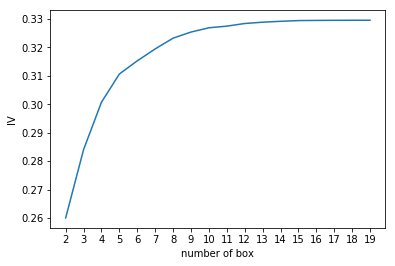

In [77]:
import matplotlib.pyplot as plt
import scipy
IV = []
axisx =[]
while len(num_bin)>2:
    pvs = []
    for i in range(len(num_bin)-1):
        x1 = num_bin[i][2:]
        x2 = num_bin[i+1][2:]
        pv = scipy.stats.chi2_contingency([x1,x2])[1]  #获取相邻两个箱子的p值
        pvs.append(pv)
    i= pvs.index(max(pvs))
    #将第i个和第i+1个箱子合并为一个
    num_bin[i:i+2]=[(num_bin[i][0],num_bin[i+1][1],num_bin[i][2]+num_bin[i+1][2],num_bin[i][3]+num_bin[i+1][3])]
    bin_df = get_woe(num_bin)
    axisx.append(len(num_bin))
    IV.append(get_iv(bin_df))
plt.figure()
plt.plot(axisx,IV)
plt.xticks(axisx)
plt.xlabel('number of box')
plt.ylabel('IV')
plt.show()

### 用最佳分箱个数分箱，并验证分箱结果

In [30]:
import scipy
def get_bin(numbin,n):
    while len(numbin)>n:
        pvs = []
        for i in range(len(numbin)-1):
            x1 = numbin[i][2:]
            x2 = numbin[i+1][2:]
            pv = scipy.stats.chi2_contingency([x1,x2])[1]
            pvs.append(pv)
        i = pvs.index(max(pvs))
        numbin[i:i+2]=[(numbin[i][0],numbin[i+1][1],numbin[i][2]+numbin[i+1][2],numbin[i][3]+numbin[i+1][3])]
    return numbin

In [29]:
num_bin = num_bins.copy()
num_bin = np.array(num_bin)
num_bin

array([[  21.        ,   28.        , 4226.        , 6048.        ],
       [  28.        ,   31.04201312, 3558.        , 5669.        ],
       [  31.04201312,   34.        , 4056.        , 6554.        ],
       [  34.        ,   36.74469634, 2824.        , 6067.        ],
       [  36.74469634,   39.        , 5126.        , 5790.        ],
       [  39.        ,   41.        , 3935.        , 5543.        ],
       [  41.        ,   43.        , 4044.        , 5703.        ],
       [  43.        ,   45.        , 4407.        , 5648.        ],
       [  45.        ,   47.        , 4757.        , 6388.        ],
       [  47.        ,   48.58203487, 2487.        , 4674.        ],
       [  48.58203487,   50.10962799, 4933.        , 4817.        ],
       [  50.10962799,   52.        , 4732.        , 5659.        ],
       [  52.        ,   54.        , 4697.        , 5413.        ],
       [  54.        ,   56.        , 4660.        , 4505.        ],
       [  56.        ,   58.847029

In [38]:
afterbin = get_bin(num_bin,4)
afterbin

[(21.0, 48.582034871531704, 39420, 58084),
 (48.582034871531704, 58.847029880111094, 23502, 25250),
 (58.847029880111094, 64.0, 13782, 7577),
 (64.0, 109.0, 21164, 6229)]

In [37]:
bin_df =get_woe(num_bin)
bin_df

,min,max,count_0,count_1,total,percentage,bad_rate,good%,bad%,woe
0,21.000000,28.000000,4226,6048,10274,0.052685,0.588670,0.043181,0.062261,-0.365938
1,28.000000,31.042013,3558,5669,9227,0.047316,0.614393,0.036355,0.058359,-0.473281
2,31.042013,34.000000,4056,6554,10610,0.054408,0.617719,0.041444,0.067470,-0.487345
3,34.000000,36.744696,2824,6067,8891,0.045593,0.682375,0.028855,0.062456,-0.772176
4,36.744696,39.000000,5126,5790,10916,0.055977,0.530414,0.052377,0.059605,-0.129273
5,39.000000,41.000000,3935,5543,9478,0.048603,0.584828,0.040207,0.057062,-0.350091
6,41.000000,43.000000,4044,5703,9747,0.049983,0.585103,0.041321,0.058709,-0.351224
7,43.000000,45.000000,4407,5648,10055,0.051562,0.561711,0.045030,0.058143,-0.255574
8,45.000000,47.000000,4757,6388,11145,0.057152,0.573172,0.048606,0.065761,-0.302270
9,47.000000,48.582035,2487,4674,7161,0.036722,0.652702,0.025412,0.048116,-0.638404


### 将选取最佳分箱个数的过程封装为函数

In [3]:
def get_best_bin(DF,X,y,n=5,q=20,graph=True):
    global bins_df
    DF=DF[[X,y]].copy()
    DF['qcut'],bins = pd.qcut(DF[X],retbins=True,q=q,duplicates='drop')
    count_y0 = DF.loc[DF[y]==0].groupby(by='qcut').count()[y]
    count_y1 = DF.loc[DF[y]==1].groupby(by='qcut').count()[y]
    num_bins = [*zip(bins,bins[1:],count_y0,count_y1)]
    
    for i in range(q):
        if 0 in num_bins[0][2:]:
            num_bins[0:2]=[(num_bins[0][0],num_bins[1][1],num_bins[0][2]+num_bins[1][2],num_bins[0][3]+num_bins[1][3])]
            continue
        
        for a in range(len(num_bins)):
            if 0 in num_bins[a][2:]:
                num_bins[a-1:a+1]=[(num_bins[a-1][0],num_bins[a][1],num_bins[a-1][2]+num_bins[a][2],num_bins[a-1][3]+num_bins[a][3])]
                break           
        else:
                break
            
    def get_woe(num_bin):
        columns = ['min','max','count0','count1']
        df = pd.DataFrame(num_bin,columns=columns)
        df['total']=df['count0']+df['count1']
        df['percentage']=df['total']/df['total'].sum()
        df['bad_rate']=df['count1']/df['total']
        df['good%']=df['count0']/df['count0'].sum()
        df['bad%']=df['count1']/df['count1'].sum()
        df['woe']=np.log(df['good%']/df['bad%'])
        return df
    def get_iv(df):
        iv = np.sum((df['good%']-df['bad%'])*df['woe'])
        return iv
    IV=[]
    axisx=[]
    import scipy
    while len(num_bins)>n:

        pvs=[]
        for i in range(len(num_bins)-1):
            x1 = num_bins[i][2:]
            x2 = num_bins[i+1][2:]
            pv = scipy.stats.chi2_contingency([x1,x2])[1]
            pvs.append(pv)
        i = pvs.index(max(pvs))
        num_bins[i:i+2]=[(num_bins[i][0],num_bins[i+1][1],num_bins[i][2]+num_bins[i+1][2],num_bins[i][3]+num_bins[i+1][3])]
        bins_df = pd.DataFrame(get_woe(num_bins))
        axisx.append(len(num_bins))
        IV.append(get_iv(bins_df))
    if graph:
        import matplotlib.pyplot as plt
        plt.figure()
        plt.plot(axisx,IV)
        plt.xlabel('Number of bins')
        plt.ylabel('IV')
        plt.show()
    return bins_df
            
                                    
            

### 对所有特征进行分箱

In [4]:
model_data.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

RevolvingUtilizationOfUnsecuredLines


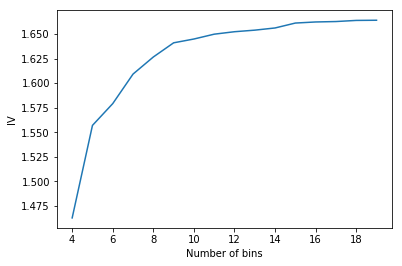

age


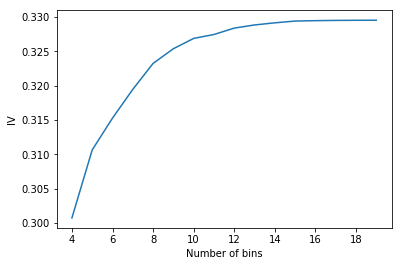

NumberOfTime30-59DaysPastDueNotWorse


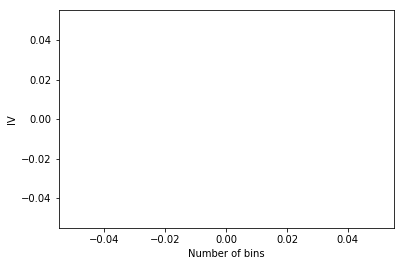

DebtRatio


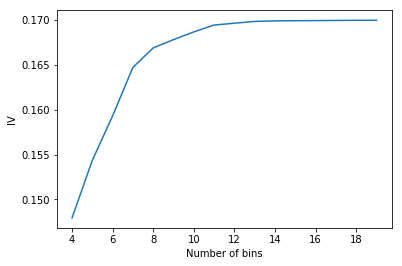

MonthlyIncome


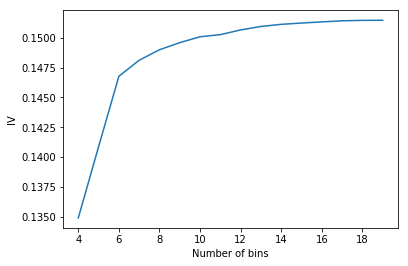

NumberOfOpenCreditLinesAndLoans


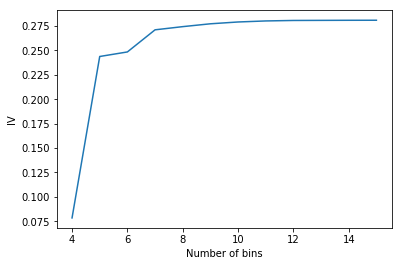

NumberOfTimes90DaysLate


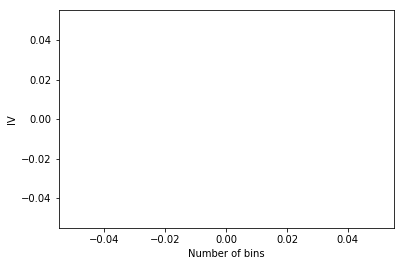

NumberRealEstateLoansOrLines


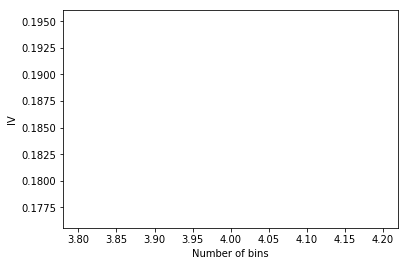

NumberOfTime60-89DaysPastDueNotWorse


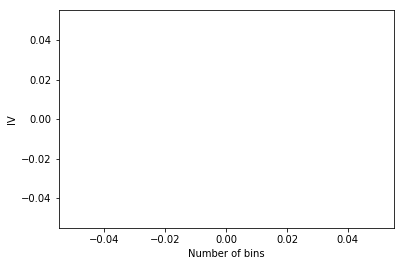

NumberOfDependents


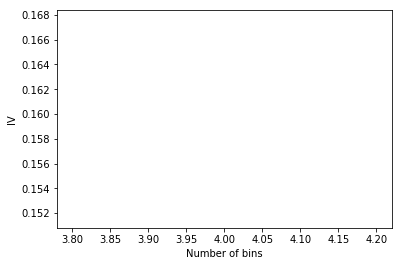

In [34]:
for i in model_data.columns[1:]:
    print(i)
    a=get_best_bin(model_data,i,'SeriousDlqin2yrs',n=4,q=20)
    a

### 手动分箱和自动分箱

In [5]:
auto_col_bins ={'RevolvingUtilizationOfUnsecuredLines':6,'age':5,'DebtRatio':4,'MonthlyIncome':3,'NumberOfOpenCreditLinesAndLoans':5}
hand_bins={'NumberOfTime30-59DaysPastDueNotWorse':[0,1,2,13],'NumberOfTimes90DaysLate':[0,1,2,17],'NumberRealEstateLoansOrLines':[0,1,2,4,54],
           'NumberOfTime60-89DaysPastDueNotWorse':[0,1,2,8],'NumberOfDependents':[0,1,2,3]}

In [6]:
hand_bins = {k:[-np.inf,*v[:-1],np.inf] for k,v in hand_bins.items()}
hand_bins

{'NumberOfTime30-59DaysPastDueNotWorse': [-inf, 0, 1, 2, inf],
 'NumberOfTimes90DaysLate': [-inf, 0, 1, 2, inf],
 'NumberRealEstateLoansOrLines': [-inf, 0, 1, 2, 4, inf],
 'NumberOfTime60-89DaysPastDueNotWorse': [-inf, 0, 1, 2, inf],
 'NumberOfDependents': [-inf, 0, 1, 2, inf]}

In [7]:
bins_of_col={}
for col in auto_col_bins:
    bins_df=get_best_bin(model_data,col,'SeriousDlqin2yrs',n=auto_col_bins[col],q=20,graph=False)
    bins_list = sorted(set(bins_df['min']).union(bins_df['max']))
    bins_list[0],bins_list[-1] = -np.inf,np.inf
    bins_of_col[col] = bins_list
bins_of_col.update(hand_bins)
# bins_of_col

### bins_of_col 为所有特征及对应的分箱

### woe映射到数据中

In [44]:
data= model_data.copy()
data=data[['age','SeriousDlqin2yrs']].copy()
data['cut']=pd.cut(data['age'],[-np.inf, 48.582034871531704, 58.847029880111094, 64.0, 74.0, np.inf])


In [45]:
data.groupby('cut')['SeriousDlqin2yrs'].value_counts()

cut               SeriousDlqin2yrs
(-inf, 48.582]    1                   58084
                  0                   39420
(48.582, 58.847]  1                   25250
                  0                   23502
(58.847, 64.0]    0                   13782
                  1                    7577
(64.0, 74.0]      0                   13410
                  1                    4699
(74.0, inf]       0                    7754
                  1                    1530
Name: SeriousDlqin2yrs, dtype: int64

In [48]:
bins_df=data.groupby('cut')['SeriousDlqin2yrs'].value_counts().unstack()
bins_df['woe']=np.log((bins_df[0]/bins_df[0].sum())/(bins_df[1]/bins_df[1].sum()))


In [52]:
bins_df.index

CategoricalIndex([(-inf, 48.582], (48.582, 58.847], (58.847, 64.0],
                  (64.0, 74.0], (74.0, inf]],
                 categories=[(-inf, 48.582], (48.582, 58.847], (58.847, 64.0], (64.0, 74.0], (74.0, inf]], ordered=True, name='cut', dtype='category')

In [8]:
def get_woe2(df,col,y,bins):
    df=df[[col,y]].copy()
    df['cut']=pd.cut(df[col],bins)
    bins_df = df.groupby('cut')[y].value_counts().unstack()
    woe = bins_df['woe'] = np.log((bins_df[0]/bins_df[0].sum())/(bins_df[1]/bins_df[1].sum()))
    return woe


In [9]:
woeall={}
for col in bins_of_col:
    woeall[col] = get_woe2(model_data,col,'SeriousDlqin2yrs',bins_of_col[col])
# woeall    #得到所有特征的分箱，及每个箱对应的woe值

In [10]:
woeall['age']

cut
(-inf, 48.582]     -0.395083
(48.582, 58.847]   -0.079207
(58.847, 64.0]      0.590780
(64.0, 74.0]        1.041185
(74.0, inf]         1.615475
dtype: float64

### 将所有WOE值映射到原始数据中

In [11]:
model_woe = pd.DataFrame(index = model_data.index)
for col in bins_of_col:
    model_woe[col]=pd.cut(model_data[col],bins_of_col[col]).map(woeall[col]) # 重点地方
model_woe['SeriousDlqin2yrs']=model_data['SeriousDlqin2yrs']
model_woe.head()

,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
0,-0.510570,-0.395083,-0.007951,-0.233551,-0.206499,1.093394,-2.558999,0.206831,-2.458632,-0.588293,1
1,1.508228,0.590780,-0.007951,0.233536,0.020344,1.093394,0.690155,-0.123129,0.536771,0.624825,0
2,2.654415,-0.079207,-0.480763,-0.233551,0.020344,1.093394,0.690155,-0.123129,0.536771,0.624825,0
3,-1.070373,1.041185,0.175908,1.315641,0.020344,-1.380968,0.690155,-0.123129,0.536771,0.624825,1
4,2.654415,-0.395083,-0.007951,0.233536,1.797662,1.093394,0.690155,-0.001193,0.536771,0.624825,0


In [60]:
model_woe.shape

(195008, 11)

In [61]:
model_data.shape

(195008, 11)

### 以上为建模数据的处理，接下来开始建模

In [12]:
vali_woe = pd.DataFrame(index=vali_data.index)
for col in bins_of_col:
    vali_woe[col] = pd.cut(vali_data[col],bins_of_col[col]).map(woeall[col])
vali_woe['SeriousDlqin2yrs']=vali_data['SeriousDlqin2yrs']


In [65]:
vali_woe.shape


(83576, 11)

In [66]:
vali_data.shape

(83576, 11)

In [15]:
vali_x= vali_woe.iloc[:,:-1]
vali_y= vali_woe.iloc[:,-1]

### 开始建模

In [13]:
X = model_woe.iloc[:,:-1]
y = model_woe.iloc[:,-1]
from sklearn.linear_model import LogisticRegression as LR


In [16]:
lr = LR().fit(X,y)
lr.score(vali_x,vali_y)

C:\Users\zhuxi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8637886474586005

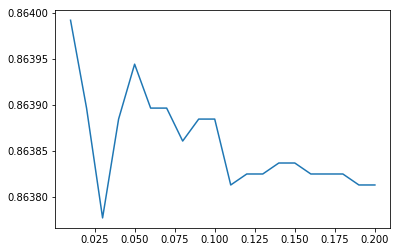

In [74]:
import matplotlib.pyplot as plt
c_1 = np.linspace(0.01,1,20)
c_2 = np.linspace(0.01,0.2,20)
score=[]
for i in c_2:
    lr = LR(solver='liblinear',C=i).fit(X,y)
    score.append(lr.score(vali_x,vali_y))
plt.figure()
plt.plot(c_2,score)
plt.show()

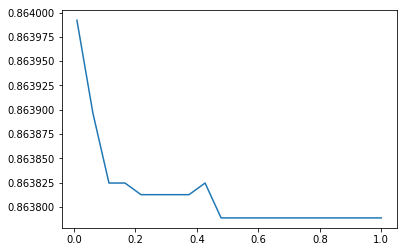

In [75]:
score1=[]
for i in c_1:
    lr = LR(solver='liblinear',C=i).fit(X,y)
    score1.append(lr.score(vali_x,vali_y))
plt.figure()
plt.plot(c_1,score1)
plt.show()

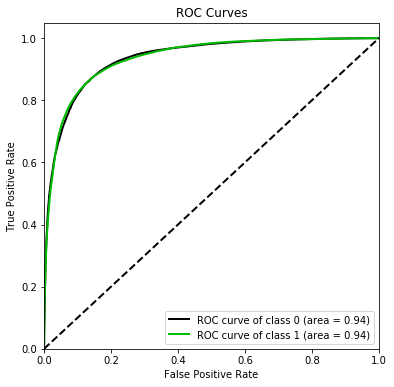

In [76]:
import scikitplot as skplt
vali_proba_df = pd.DataFrame(lr.predict_proba(vali_x))
skplt.metrics.plot_roc(vali_y,vali_proba_df,plot_micro=False,figsize=(6,6),plot_macro=False)

### 输出评分卡结果

In [17]:
B = 20/np.log(2)
A = 600+B*np.log(1/60)

In [18]:
base_score = A-B*lr.intercept_
base_score

array([481.58995544])

In [25]:
file = 'D:/sklearn-data/give-me-some-credit-dataset/ScoreData.csv'
with open(file,'w') as fp:
    fp.write('base_score,{}\n'.format(base_score))
for i,col in enumerate(X.columns):
    score=woeall[col]*(-B*lr.coef_[0][i])     #计算每个特征中每个分箱对应的分数 ，索引是每个分箱的区间
    score.name="Score"                       #给分数列加上列名 Score
    score.index.name=col                       #给索引列加上列名，即特征名
    score.to_csv(file,header=True,mode='a')